# Project Data Mining - Analisis Dataset Asuransi

## Tujuan
Analisis dataset asuransi untuk menemukan insights dan mempersiapkan data untuk machine learning.

---


## 1. Summary Data

Bagian ini menjelaskan ukuran dataset, variabel-variabel yang ada, dan kemungkinan target variable.

**Cara menggunakan:**
1. Jalankan cell-cell secara berurutan dari atas ke bawah
2. Pastikan file `insurance.csv` berada di folder yang sama dengan notebook ini
3. Setiap cell akan menampilkan output setelah dijalankan


## ⚠️ PENTING: Install Library Terlebih Dahulu

Jika Anda mendapat error `ModuleNotFoundError`, jalankan cell di bawah ini untuk menginstall semua library yang diperlukan.


In [1]:
# INSTALL LIBRARY YANG DIPERLUKAN
# ============================================
# JALANKAN CELL INI JIKA ANDA MENDAPAT ERROR "ModuleNotFoundError"
# ============================================

print("=" * 60)
print("INSTALL LIBRARY")
print("=" * 60)
print("\nMenginstall library yang diperlukan...")
print("(Ini mungkin memakan waktu beberapa menit)\n")

# Install semua library sekaligus
%pip install pandas numpy matplotlib seaborn scipy

print("\n" + "=" * 60)
print("✓ INSTALL SELESAI!")
print("=" * 60)
print("\n⚠️ PENTING:")
print("1. Restart kernel setelah install selesai")
print("2. Jalankan ulang cell import library")
print("\nCara restart kernel:")
print("  - Jupyter: Kernel → Restart")
print("  - VS Code: Klik tombol 'Restart' di toolbar")
print("  - Atau gunakan shortcut: Ctrl+Shift+P → 'Restart Kernel'")


INSTALL LIBRARY

Menginstall library yang diperlukan...
(Ini mungkin memakan waktu beberapa menit)

Note: you may need to restart the kernel to use updated packages.

✓ INSTALL SELESAI!

⚠️ PENTING:
1. Restart kernel setelah install selesai
2. Jalankan ulang cell import library

Cara restart kernel:
  - Jupyter: Kernel → Restart
  - VS Code: Klik tombol 'Restart' di toolbar
  - Atau gunakan shortcut: Ctrl+Shift+P → 'Restart Kernel'



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import library yang diperlukan
# ============================================
# Data Manipulation & Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy import stats
from scipy.stats import ttest_ind, levene

# Jupyter Display
from IPython.display import display

# Warnings (optional - untuk suppress warnings jika perlu)
import warnings
warnings.filterwarnings('ignore')  # Hapus baris ini jika ingin melihat warnings

# ============================================
# Set style untuk visualisasi
try:
    plt.style.use('seaborn-v0_8')
except:
    try:
        plt.style.use('seaborn')
    except:
        try:
            plt.style.use('seaborn-whitegrid')
        except:
            plt.style.use('default')

sns.set_palette("husl")
%matplotlib inline

# Set ukuran default untuk plot
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# ============================================
# Konfirmasi library berhasil diimport
print("=" * 60)
print("IMPORT LIBRARY")
print("=" * 60)
print("\n✓ Library berhasil diimport!")
print("\nLibrary yang digunakan:")
print(f"  ✓ pandas (v{pd.__version__}) - Data manipulation")
print(f"  ✓ numpy (v{np.__version__}) - Numerical computing")
print(f"  ✓ matplotlib (v{plt.matplotlib.__version__}) - Plotting")
print(f"  ✓ seaborn (v{sns.__version__}) - Statistical visualization")
print(f"  ✓ scipy.stats - Statistical tests")
print(f"  ✓ IPython.display - Display utilities")
print("\n" + "=" * 60)
print("✓ SEMUA LIBRARY SIAP DIGUNAKAN!")
print("=" * 60)


IMPORT LIBRARY

✓ Library berhasil diimport!

Library yang digunakan:
  ✓ pandas (v2.3.3) - Data manipulation
  ✓ numpy (v2.2.6) - Numerical computing
  ✓ matplotlib (v3.10.7) - Plotting
  ✓ seaborn (v0.13.2) - Statistical visualization
  ✓ scipy.stats - Statistical tests
  ✓ IPython.display - Display utilities

✓ SEMUA LIBRARY SIAP DIGUNAKAN!


In [3]:
# TEST: Pastikan semua library berfungsi dengan baik
print("Menguji library...")
print("=" * 60)

# Test pandas
test_df = pd.DataFrame({'test': [1, 2, 3]})
print("✓ pandas berfungsi")

# Test numpy
test_array = np.array([1, 2, 3])
print("✓ numpy berfungsi")

# Test matplotlib
fig, ax = plt.subplots(figsize=(4, 2))
ax.plot([1, 2, 3], [1, 2, 3])
ax.set_title('Test Plot')
plt.close()  # Tutup plot test
print("✓ matplotlib berfungsi")

# Test seaborn
print("✓ seaborn berfungsi")

# Test scipy
test_stat = stats.norm.rvs(size=10)
print("✓ scipy.stats berfungsi")

print("\n" + "=" * 60)
print("✓ SEMUA LIBRARY SIAP DIGUNAKAN!")
print("=" * 60)


Menguji library...
✓ pandas berfungsi
✓ numpy berfungsi
✓ matplotlib berfungsi
✓ seaborn berfungsi
✓ scipy.stats berfungsi

✓ SEMUA LIBRARY SIAP DIGUNAKAN!


In [4]:
# Load dataset
try:
    df = pd.read_csv('insurance.csv')
    print("✓ Dataset berhasil dimuat!")
    print(f"  File: insurance.csv")
    print(f"  Lokasi: Pastikan file berada di folder yang sama dengan notebook ini")
except FileNotFoundError:
    print("✗ ERROR: File 'insurance.csv' tidak ditemukan!")
    print("  Pastikan file insurance.csv berada di folder yang sama dengan notebook ini")
    raise
except Exception as e:
    print(f"✗ ERROR: {str(e)}")
    raise

# Tampilkan informasi dasar dataset
print("\n" + "=" * 60)
print("SUMMARY DATASET ASURANSI")
print("=" * 60)
print(f"\nUkuran Dataset: {df.shape[0]} baris x {df.shape[1]} kolom")
print(f"\nNama Kolom:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

print("\n" + "=" * 60)
print("INFORMASI VARIABEL")
print("=" * 60)
df.info()
print("\n✓ Informasi dataset berhasil ditampilkan!")


✓ Dataset berhasil dimuat!
  File: insurance.csv
  Lokasi: Pastikan file berada di folder yang sama dengan notebook ini

SUMMARY DATASET ASURANSI

Ukuran Dataset: 1338 baris x 7 kolom

Nama Kolom:
1. age
2. sex
3. bmi
4. children
5. smoker
6. region
7. charges

INFORMASI VARIABEL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

✓ Informasi dataset berhasil ditampilkan!


In [5]:
# Tampilkan beberapa baris pertama
print("\n" + "=" * 60)
print("PREVIEW DATA (5 baris pertama)")
print("=" * 60)
display(df.head())
print(f"\nTotal baris: {len(df)}")
print(f"Total kolom: {len(df.columns)}")



PREVIEW DATA (5 baris pertama)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Total baris: 1338
Total kolom: 7


In [6]:
# Statistik deskriptif
print("\n" + "=" * 60)
print("STATISTIK DESKRIPTIF")
print("=" * 60)
display(df.describe())
print("\nStatistik untuk variabel numerik:")
print(f"  - Age: min={df['age'].min()}, max={df['age'].max()}, mean={df['age'].mean():.2f}")
print(f"  - BMI: min={df['bmi'].min():.2f}, max={df['bmi'].max():.2f}, mean={df['bmi'].mean():.2f}")
print(f"  - Children: min={df['children'].min()}, max={df['children'].max()}, mean={df['children'].mean():.2f}")
print(f"  - Charges: min=${df['charges'].min():.2f}, max=${df['charges'].max():.2f}, mean=${df['charges'].mean():.2f}")



STATISTIK DESKRIPTIF


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Statistik untuk variabel numerik:
  - Age: min=18, max=64, mean=39.21
  - BMI: min=15.96, max=53.13, mean=30.66
  - Children: min=0, max=5, mean=1.09
  - Charges: min=$1121.87, max=$63770.43, mean=$13270.42


In [7]:
# Identifikasi variabel kategorikal
print("\n" + "=" * 60)
print("VARIABEL KATEGORIKAL")
print("=" * 60)
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\nVariabel Kategorikal: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Identifikasi variabel numerik
print("\n" + "=" * 60)
print("VARIABEL NUMERIK")
print("=" * 60)
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"\nVariabel Numerik: {list(numeric_cols)}")



VARIABEL KATEGORIKAL

Variabel Kategorikal: ['sex', 'smoker', 'region']

sex:
sex
male      676
female    662
Name: count, dtype: int64

smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

VARIABEL NUMERIK

Variabel Numerik: ['age', 'bmi', 'children', 'charges']


In [8]:
# Kesimpulan Summary Data
print("\n" + "=" * 60)
print("KESIMPULAN SUMMARY DATA")
print("=" * 60)
print(f"""
1. Ukuran Dataset: {df.shape[0]} baris dan {df.shape[1]} kolom

2. Variabel dalam Dataset:
   - age (numerik): Usia pemegang polis
   - sex (kategorikal): Jenis kelamin (male/female)
   - bmi (numerik): Body Mass Index
   - children (numerik): Jumlah anak yang ditanggung
   - smoker (kategorikal): Status perokok (yes/no)
   - region (kategorikal): Wilayah (northeast/northwest/southeast/southwest)
   - charges (numerik): Biaya asuransi medis (TARGET VARIABLE)

3. Target Variable: 'charges' - biaya asuransi medis yang dibayarkan

4. Tipe Data:
   - Numerik: age, bmi, children, charges
   - Kategorikal: sex, smoker, region
""")



KESIMPULAN SUMMARY DATA

1. Ukuran Dataset: 1338 baris dan 7 kolom

2. Variabel dalam Dataset:
   - age (numerik): Usia pemegang polis
   - sex (kategorikal): Jenis kelamin (male/female)
   - bmi (numerik): Body Mass Index
   - children (numerik): Jumlah anak yang ditanggung
   - smoker (kategorikal): Status perokok (yes/no)
   - region (kategorikal): Wilayah (northeast/northwest/southeast/southwest)
   - charges (numerik): Biaya asuransi medis (TARGET VARIABLE)

3. Target Variable: 'charges' - biaya asuransi medis yang dibayarkan

4. Tipe Data:
   - Numerik: age, bmi, children, charges
   - Kategorikal: sex, smoker, region



## 2. Data Exploration Plan

Rencana eksplorasi data yang logis dan bermakna untuk memahami dataset asuransi.


In [9]:
# Data Exploration Plan
print("=" * 60)
print("RENCANA EKSPLORASI DATA")
print("=" * 60)
print("""
1. Pemeriksaan Data Dasar
   - Ukuran dataset dan struktur data
   - Tipe data setiap variabel
   - Missing values
   - Duplikasi data

2. Analisis Variabel Numerik
   - Distribusi setiap variabel numerik
   - Outlier detection
   - Korelasi antar variabel numerik
   - Hubungan dengan target variable (charges)

3. Analisis Variabel Kategorikal
   - Distribusi setiap kategori
   - Hubungan dengan target variable (charges)
   - Kombinasi kategori yang menarik

4. Analisis Target Variable (charges)
   - Distribusi charges
   - Faktor-faktor yang mempengaruhi charges
   - Identifikasi pola dan tren

5. Visualisasi Insights
   - Histogram dan boxplot untuk distribusi
   - Scatter plot untuk hubungan numerik
   - Bar chart untuk kategori
   - Heatmap untuk korelasi

6. Data Quality Assessment
   - Missing values handling
   - Outlier treatment
   - Data consistency check
""")


RENCANA EKSPLORASI DATA

1. Pemeriksaan Data Dasar
   - Ukuran dataset dan struktur data
   - Tipe data setiap variabel
   - Missing values
   - Duplikasi data

2. Analisis Variabel Numerik
   - Distribusi setiap variabel numerik
   - Outlier detection
   - Korelasi antar variabel numerik
   - Hubungan dengan target variable (charges)

3. Analisis Variabel Kategorikal
   - Distribusi setiap kategori
   - Hubungan dengan target variable (charges)
   - Kombinasi kategori yang menarik

4. Analisis Target Variable (charges)
   - Distribusi charges
   - Faktor-faktor yang mempengaruhi charges
   - Identifikasi pola dan tren

5. Visualisasi Insights
   - Histogram dan boxplot untuk distribusi
   - Scatter plot untuk hubungan numerik
   - Bar chart untuk kategori
   - Heatmap untuk korelasi

6. Data Quality Assessment
   - Missing values handling
   - Outlier treatment
   - Data consistency check



## 3. Exploratory Data Analysis (EDA)

Analisis eksplorasi data untuk menemukan pola, hubungan, dan insights yang informatif dan actionable.


In [10]:
# Pemeriksaan Missing Values
print("=" * 60)
print("PEMERIKSAAN MISSING VALUES")
print("=" * 60)
missing_values = df.isnull().sum()
print("\nMissing Values per Kolom:")
print(missing_values)
print(f"\nTotal Missing Values: {missing_values.sum()}")

# Pemeriksaan Duplikasi
print("\n" + "=" * 60)
print("PEMERIKSAAN DUPLIKASI")
print("=" * 60)
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")
if duplicates > 0:
    print("\nBaris duplikat:")
    print(df[df.duplicated()])


PEMERIKSAAN MISSING VALUES

Missing Values per Kolom:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Total Missing Values: 0

PEMERIKSAAN DUPLIKASI
Jumlah baris duplikat: 1

Baris duplikat:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


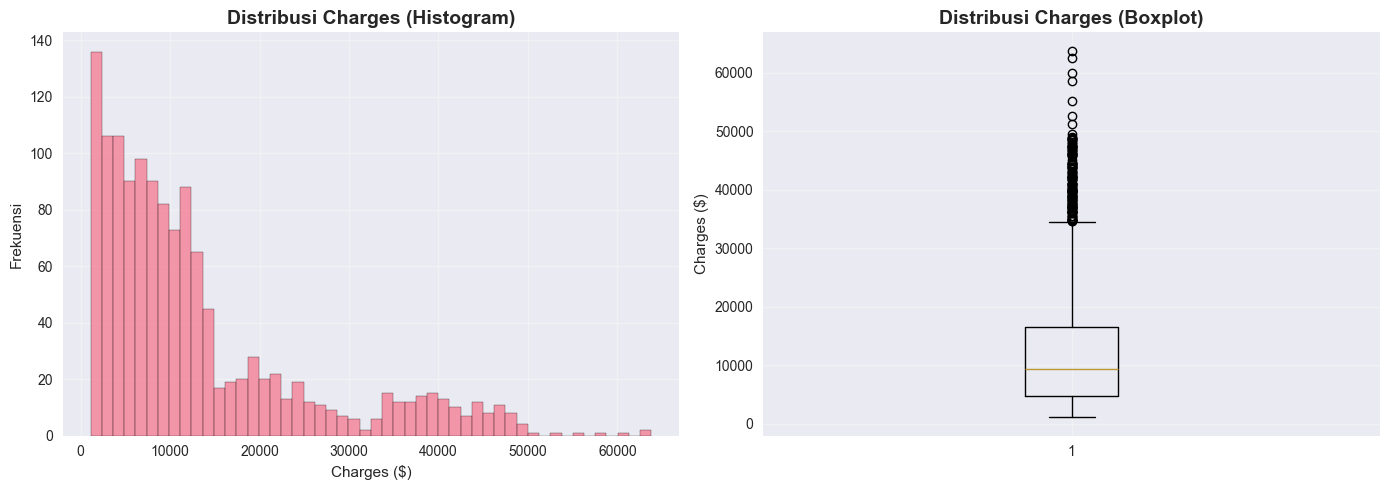


Statistik Charges:
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


In [11]:
# Visualisasi Distribusi Target Variable (charges)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['charges'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribusi Charges (Histogram)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Charges ($)')
axes[0].set_ylabel('Frekuensi')
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(df['charges'], vert=True)
axes[1].set_title('Distribusi Charges (Boxplot)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Charges ($)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nStatistik Charges:")
print(df['charges'].describe())


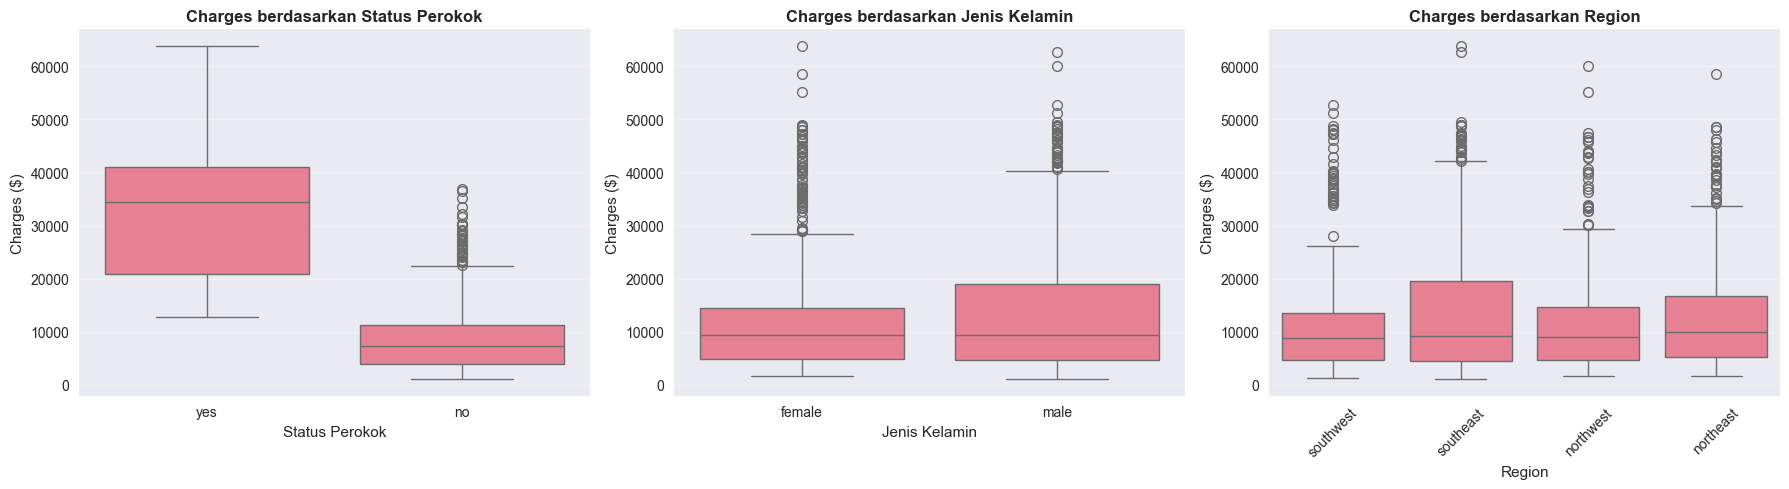


Rata-rata Charges berdasarkan Status Perokok:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Rata-rata Charges berdasarkan Jenis Kelamin:
sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

Rata-rata Charges berdasarkan Region:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


In [12]:
# Analisis Hubungan Charges dengan Variabel Kategorikal
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Charges vs Smoker
sns.boxplot(data=df, x='smoker', y='charges', ax=axes[0])
axes[0].set_title('Charges berdasarkan Status Perokok', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Status Perokok')
axes[0].set_ylabel('Charges ($)')

# Charges vs Sex
sns.boxplot(data=df, x='sex', y='charges', ax=axes[1])
axes[1].set_title('Charges berdasarkan Jenis Kelamin', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Jenis Kelamin')
axes[1].set_ylabel('Charges ($)')

# Charges vs Region
sns.boxplot(data=df, x='region', y='charges', ax=axes[2])
axes[2].set_title('Charges berdasarkan Region', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Charges ($)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Statistik ringkas
print("\nRata-rata Charges berdasarkan Status Perokok:")
print(df.groupby('smoker')['charges'].mean())
print("\nRata-rata Charges berdasarkan Jenis Kelamin:")
print(df.groupby('sex')['charges'].mean())
print("\nRata-rata Charges berdasarkan Region:")
print(df.groupby('region')['charges'].mean())


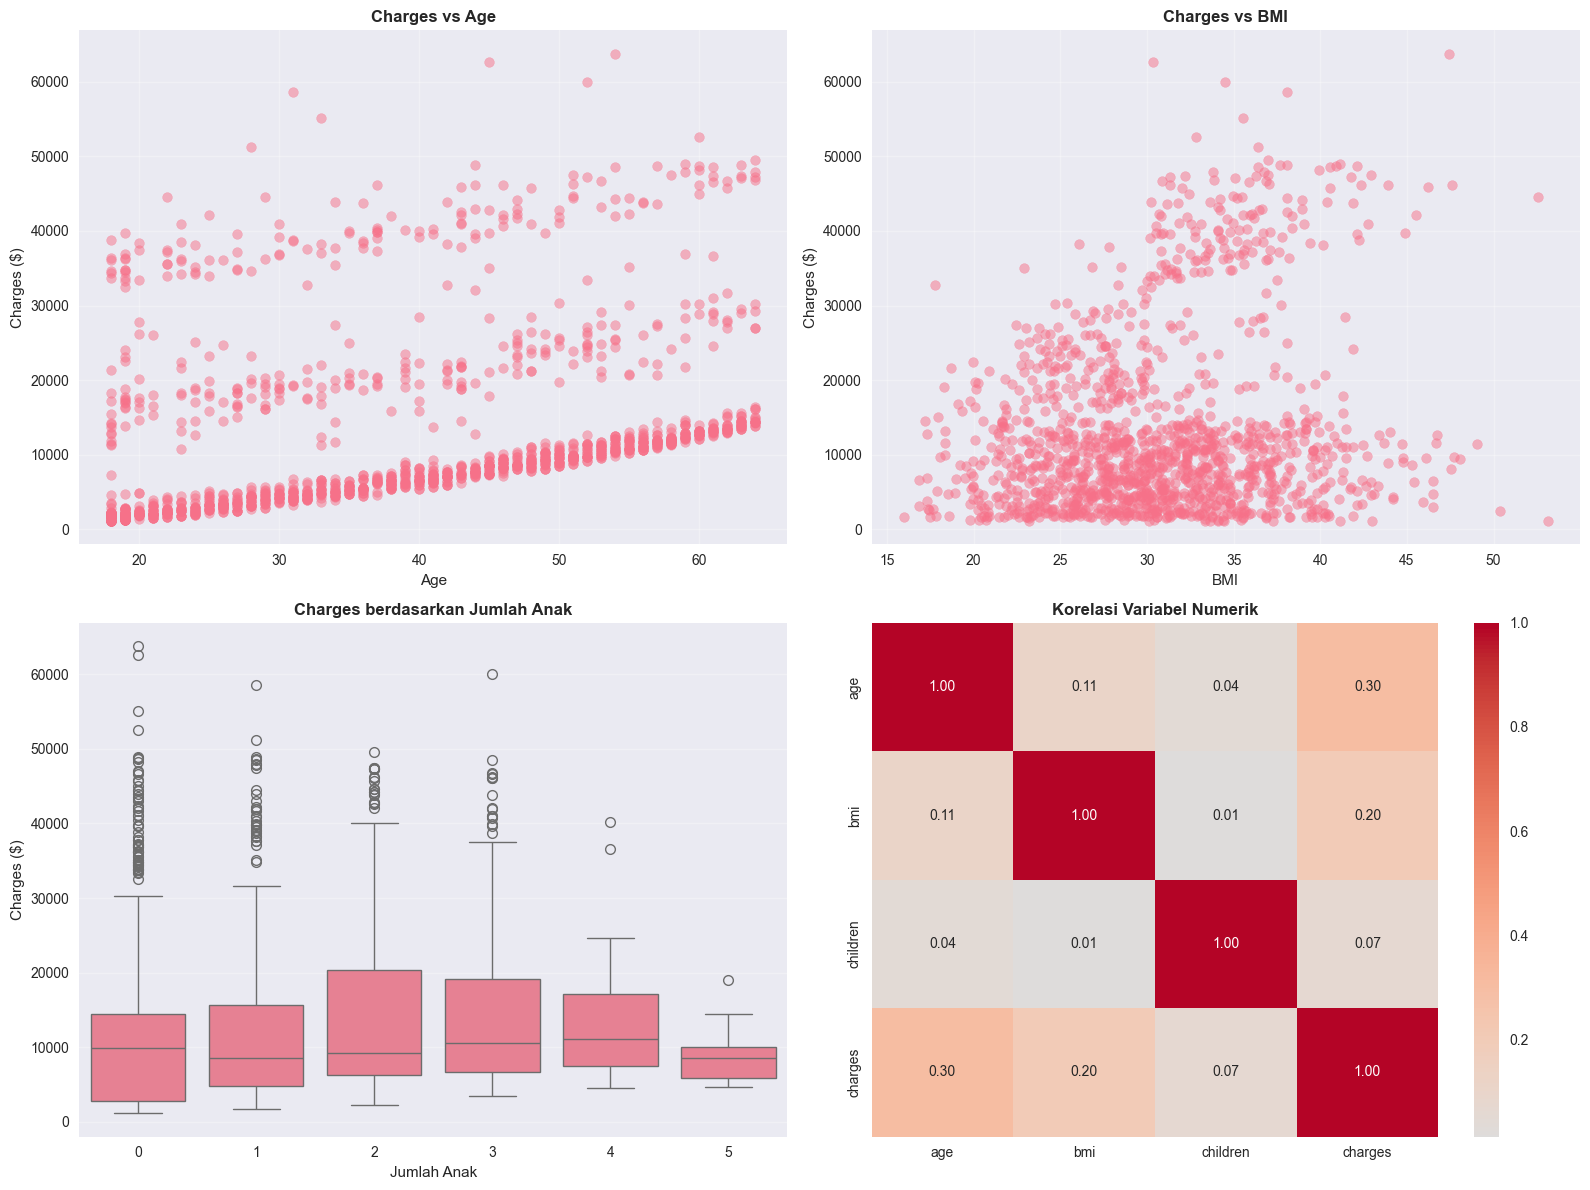


Korelasi dengan Charges:
charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


In [13]:
# Analisis Hubungan Charges dengan Variabel Numerik
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Charges vs Age
axes[0, 0].scatter(df['age'], df['charges'], alpha=0.5)
axes[0, 0].set_title('Charges vs Age', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Charges ($)')
axes[0, 0].grid(True, alpha=0.3)

# Charges vs BMI
axes[0, 1].scatter(df['bmi'], df['charges'], alpha=0.5)
axes[0, 1].set_title('Charges vs BMI', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Charges ($)')
axes[0, 1].grid(True, alpha=0.3)

# Charges vs Children
sns.boxplot(data=df, x='children', y='charges', ax=axes[1, 0])
axes[1, 0].set_title('Charges berdasarkan Jumlah Anak', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Jumlah Anak')
axes[1, 0].set_ylabel('Charges ($)')

# Heatmap Korelasi
correlation = df[['age', 'bmi', 'children', 'charges']].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Korelasi Variabel Numerik', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nKorelasi dengan Charges:")
print(correlation['charges'].sort_values(ascending=False))


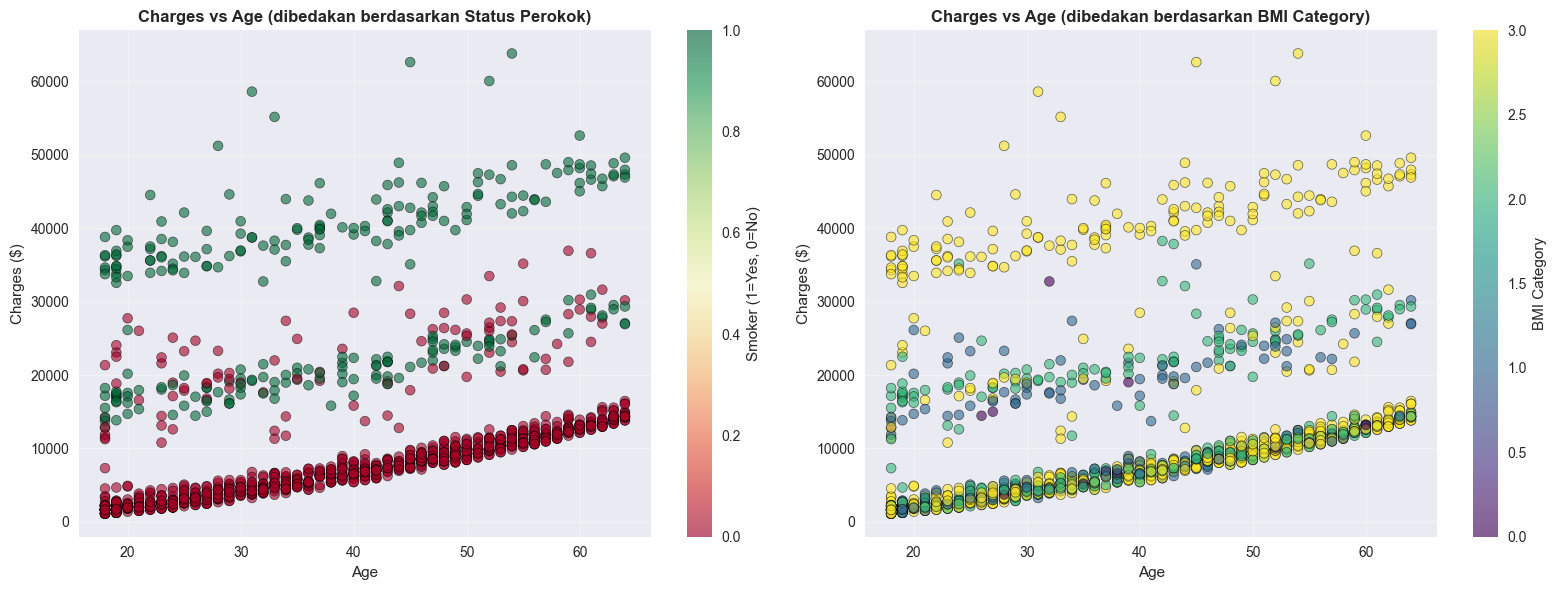

In [14]:
# Analisis Kombinasi Faktor: Smoker dan Age
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot dengan warna berdasarkan smoker
scatter = axes[0].scatter(df['age'], df['charges'], c=df['smoker'].map({'yes': 1, 'no': 0}), 
                         cmap='RdYlGn', alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].set_title('Charges vs Age (dibedakan berdasarkan Status Perokok)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Charges ($)')
axes[0].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=axes[0])
cbar.set_label('Smoker (1=Yes, 0=No)')

# Scatter plot dengan warna berdasarkan BMI kategori
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 100], 
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
scatter2 = axes[1].scatter(df['age'], df['charges'], c=df['bmi_category'].cat.codes, 
                          cmap='viridis', alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1].set_title('Charges vs Age (dibedakan berdasarkan BMI Category)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Charges ($)')
axes[1].grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('BMI Category')

plt.tight_layout()
plt.show()


## 4. Data Cleaning & Feature Engineering

Pembersihan data dan pembuatan fitur baru untuk meningkatkan kualitas data.


In [15]:
# Buat copy dataset untuk cleaning
df_clean = df.copy()

print("=" * 60)
print("DATA CLEANING")
print("=" * 60)

# 1. Handle Missing Values (jika ada)
print("\n1. Pemeriksaan Missing Values:")
print(f"   Total missing values: {df_clean.isnull().sum().sum()}")
if df_clean.isnull().sum().sum() > 0:
    print("   Missing values ditemukan, akan dihandle...")
    # Contoh: fill dengan median untuk numerik, mode untuk kategorikal
    for col in df_clean.columns:
        if df_clean[col].isnull().sum() > 0:
            if df_clean[col].dtype in ['int64', 'float64']:
                df_clean[col].fillna(df_clean[col].median(), inplace=True)
                print(f"   - {col}: diisi dengan median")
            else:
                df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
                print(f"   - {col}: diisi dengan mode")
else:
    print("   ✓ Tidak ada missing values")

# 2. Handle Duplicates
print("\n2. Pemeriksaan Duplikasi:")
duplicates = df_clean.duplicated().sum()
print(f"   Jumlah duplikat: {duplicates}")
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"   ✓ {duplicates} baris duplikat dihapus")
else:
    print("   ✓ Tidak ada duplikat")

print(f"\nUkuran dataset setelah cleaning: {df_clean.shape[0]} baris x {df_clean.shape[1]} kolom")


DATA CLEANING

1. Pemeriksaan Missing Values:
   Total missing values: 0
   ✓ Tidak ada missing values

2. Pemeriksaan Duplikasi:
   Jumlah duplikat: 1
   ✓ 1 baris duplikat dihapus

Ukuran dataset setelah cleaning: 1337 baris x 8 kolom


In [16]:
# Feature Engineering
print("=" * 60)
print("FEATURE ENGINEERING")
print("=" * 60)

# 1. Encoding Variabel Kategorikal
print("\n1. Encoding Variabel Kategorikal:")

# Label Encoding untuk smoker (yes=1, no=0)
df_clean['smoker_encoded'] = df_clean['smoker'].map({'yes': 1, 'no': 0})
print("   ✓ smoker_encoded: yes=1, no=0")

# Label Encoding untuk sex (male=1, female=0)
df_clean['sex_encoded'] = df_clean['sex'].map({'male': 1, 'female': 0})
print("   ✓ sex_encoded: male=1, female=0")

# One-Hot Encoding untuk region
region_dummies = pd.get_dummies(df_clean['region'], prefix='region')
df_clean = pd.concat([df_clean, region_dummies], axis=1)
print("   ✓ region: one-hot encoding (region_northeast, region_northwest, region_southeast, region_southwest)")

# 2. Membuat Fitur Baru
print("\n2. Membuat Fitur Baru:")

# BMI Category (sudah dibuat sebelumnya di EDA)
print("   ✓ bmi_category: Underweight, Normal, Overweight, Obese")

# Age Group
df_clean['age_group'] = pd.cut(df_clean['age'], bins=[0, 30, 40, 50, 100], 
                               labels=['Young', 'Middle', 'Senior', 'Elderly'])
print("   ✓ age_group: Young (<30), Middle (30-40), Senior (40-50), Elderly (>50)")

# Children Category
df_clean['has_children'] = (df_clean['children'] > 0).astype(int)
print("   ✓ has_children: 1 jika punya anak, 0 jika tidak")

# Interaction Features
df_clean['age_bmi'] = df_clean['age'] * df_clean['bmi']
print("   ✓ age_bmi: interaksi age x bmi")

df_clean['smoker_age'] = df_clean['smoker_encoded'] * df_clean['age']
print("   ✓ smoker_age: interaksi smoker x age")

print(f"\nTotal fitur setelah feature engineering: {df_clean.shape[1]} kolom")
print(f"\nFitur baru yang dibuat:")
new_features = ['smoker_encoded', 'sex_encoded', 'region_northeast', 'region_northwest', 
                'region_southeast', 'region_southwest', 'bmi_category', 'age_group', 
                'has_children', 'age_bmi', 'smoker_age']
for feat in new_features:
    if feat in df_clean.columns:
        print(f"   - {feat}")


FEATURE ENGINEERING

1. Encoding Variabel Kategorikal:
   ✓ smoker_encoded: yes=1, no=0
   ✓ sex_encoded: male=1, female=0
   ✓ region: one-hot encoding (region_northeast, region_northwest, region_southeast, region_southwest)

2. Membuat Fitur Baru:
   ✓ bmi_category: Underweight, Normal, Overweight, Obese
   ✓ age_group: Young (<30), Middle (30-40), Senior (40-50), Elderly (>50)
   ✓ has_children: 1 jika punya anak, 0 jika tidak
   ✓ age_bmi: interaksi age x bmi
   ✓ smoker_age: interaksi smoker x age

Total fitur setelah feature engineering: 18 kolom

Fitur baru yang dibuat:
   - smoker_encoded
   - sex_encoded
   - region_northeast
   - region_northwest
   - region_southeast
   - region_southwest
   - bmi_category
   - age_group
   - has_children
   - age_bmi
   - smoker_age


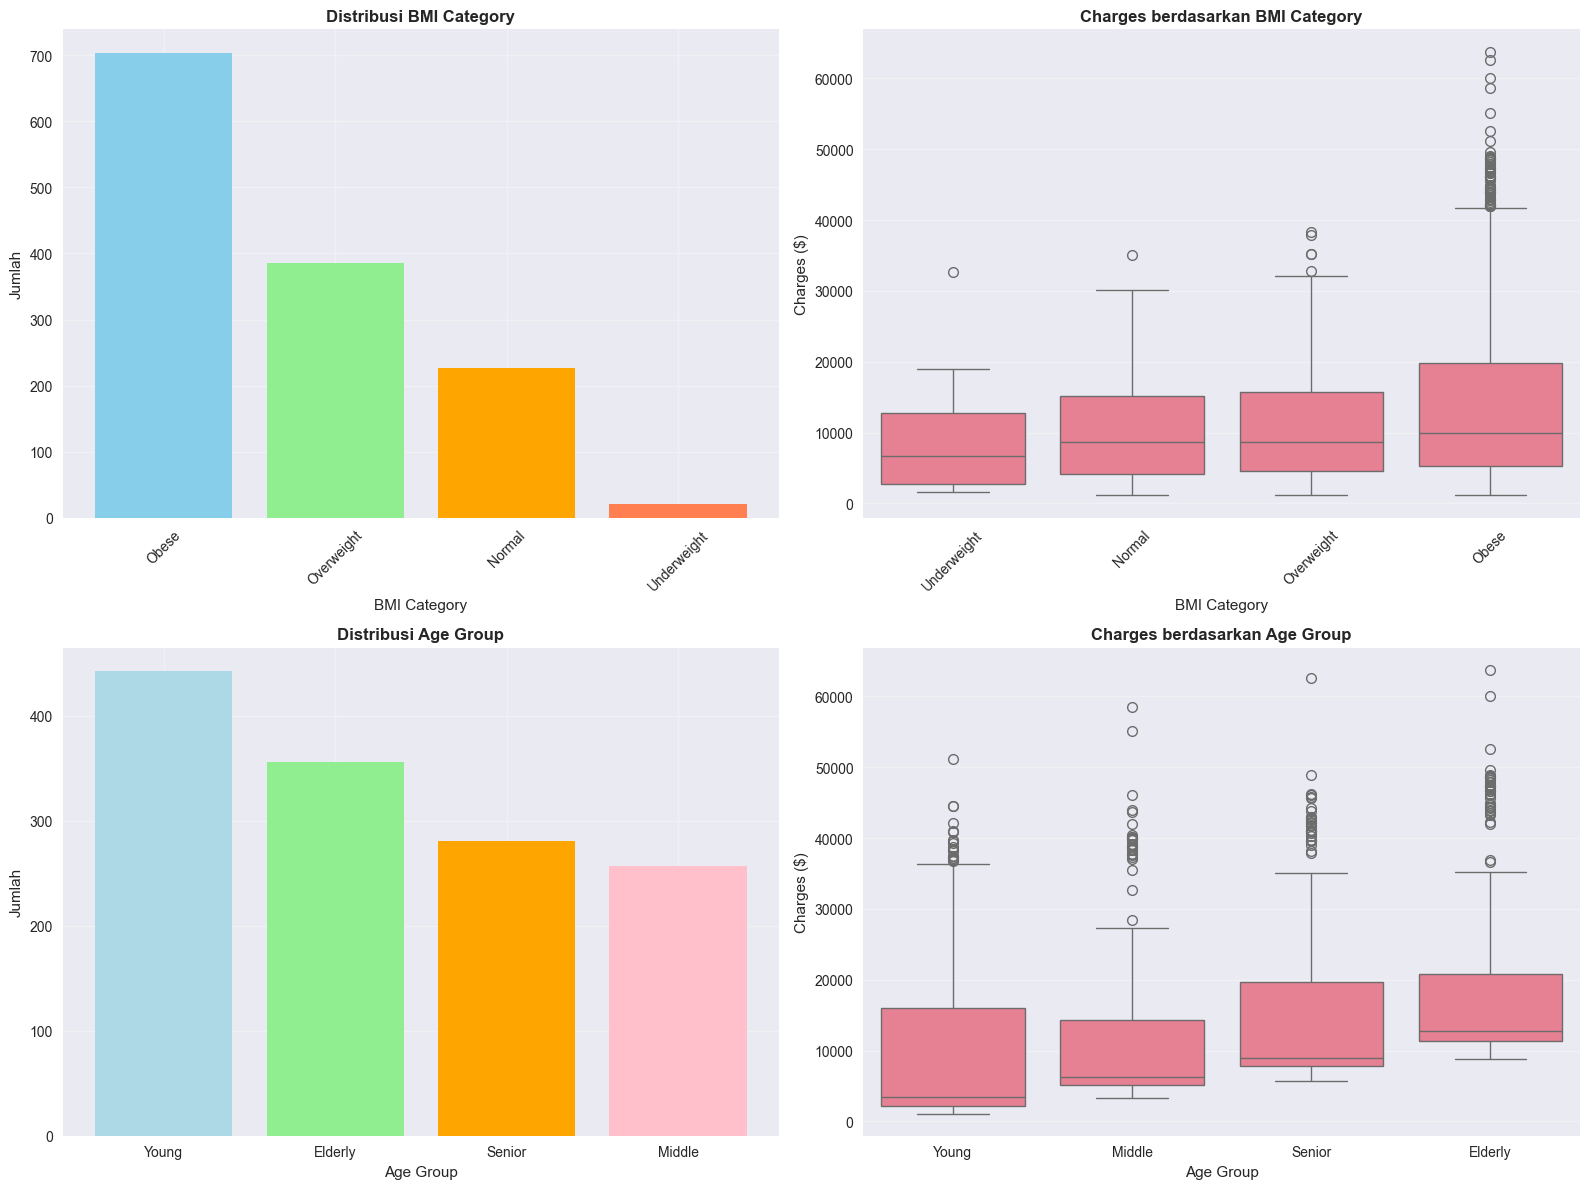


Rata-rata Charges berdasarkan BMI Category:
bmi_category
Underweight     8657.620652
Normal         10435.440719
Overweight     10997.803881
Obese          15580.700985
Name: charges, dtype: float64

Rata-rata Charges berdasarkan Age Group:
age_group
Young       9415.064442
Middle     11639.308653
Senior     14782.043077
Elderly    18084.987223
Name: charges, dtype: float64


In [17]:
# Visualisasi Hasil Feature Engineering
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribusi BMI Category
bmi_counts = df_clean['bmi_category'].value_counts()
axes[0, 0].bar(bmi_counts.index, bmi_counts.values, color=['skyblue', 'lightgreen', 'orange', 'coral'])
axes[0, 0].set_title('Distribusi BMI Category', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('BMI Category')
axes[0, 0].set_ylabel('Jumlah')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Charges berdasarkan BMI Category
sns.boxplot(data=df_clean, x='bmi_category', y='charges', ax=axes[0, 1])
axes[0, 1].set_title('Charges berdasarkan BMI Category', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('BMI Category')
axes[0, 1].set_ylabel('Charges ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Distribusi Age Group
age_counts = df_clean['age_group'].value_counts()
axes[1, 0].bar(age_counts.index, age_counts.values, color=['lightblue', 'lightgreen', 'orange', 'pink'])
axes[1, 0].set_title('Distribusi Age Group', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Jumlah')

# 4. Charges berdasarkan Age Group
sns.boxplot(data=df_clean, x='age_group', y='charges', ax=axes[1, 1])
axes[1, 1].set_title('Charges berdasarkan Age Group', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Charges ($)')

plt.tight_layout()
plt.show()

# Tampilkan statistik
print("\nRata-rata Charges berdasarkan BMI Category:")
print(df_clean.groupby('bmi_category')['charges'].mean())
print("\nRata-rata Charges berdasarkan Age Group:")
print(df_clean.groupby('age_group')['charges'].mean())


In [18]:
# Tampilkan sample data setelah cleaning dan feature engineering
print("=" * 60)
print("SAMPLE DATA SETELAH CLEANING & FEATURE ENGINEERING")
print("=" * 60)
print("\nKolom-kolom yang tersedia:")
print(df_clean.columns.tolist())
print(f"\nTotal kolom: {len(df_clean.columns)}")
print("\n5 baris pertama:")
display(df_clean.head())
print("\nInfo dataset setelah feature engineering:")
print(f"  - Ukuran: {df_clean.shape[0]} baris x {df_clean.shape[1]} kolom")
print(f"  - Fitur baru ditambahkan: {df_clean.shape[1] - df.shape[1]} kolom")


SAMPLE DATA SETELAH CLEANING & FEATURE ENGINEERING

Kolom-kolom yang tersedia:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'bmi_category', 'smoker_encoded', 'sex_encoded', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'age_group', 'has_children', 'age_bmi', 'smoker_age']

Total kolom: 18

5 baris pertama:


,age,sex,bmi,children,smoker,region,charges,bmi_category,smoker_encoded,sex_encoded,region_northeast,region_northwest,region_southeast,region_southwest,age_group,has_children,age_bmi,smoker_age
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,1,0,False,False,False,True,Young,0,530.100,19
1,18,male,33.770,1,no,southeast,1725.55230,Obese,0,1,False,False,True,False,Young,1,607.860,0
2,28,male,33.000,3,no,southeast,4449.46200,Obese,0,1,False,False,True,False,Young,1,924.000,0
3,33,male,22.705,0,no,northwest,21984.47061,Normal,0,1,False,True,False,False,Middle,0,749.265,0
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,0,1,False,True,False,False,Middle,0,924.160,0



Info dataset setelah feature engineering:
  - Ukuran: 1337 baris x 18 kolom
  - Fitur baru ditambahkan: 10 kolom


## 5. Key Findings & Insights

Sintesis hasil EDA yang bermakna dan actionable.


In [19]:
print("=" * 60)
print("KEY FINDINGS & INSIGHTS")
print("=" * 60)

print("""
1. TENTANG TARGET VARIABLE (CHARGES)
   - Distribusi charges sangat right-skewed (condong ke kanan)
   - Rata-rata charges: ${:.2f}
   - Median charges: ${:.2f}
   - Range charges: ${:.2f} - ${:.2f}
   - Terdapat banyak outlier di nilai tinggi, menunjukkan beberapa individu dengan biaya medis sangat tinggi

2. FAKTOR YANG PALING MEMPENGARUHI CHARGES
   - Status Perokok: Faktor paling signifikan!
     * Perokok memiliki rata-rata charges ${:.2f}
     * Non-perokok memiliki rata-rata charges ${:.2f}
     * Perbedaan: ${:.2f} (sekitar {:.1f}x lebih tinggi)
   
   - Usia: Korelasi positif dengan charges
     * Semakin tua, semakin tinggi charges
     * Pola linier yang jelas terlihat
   
   - BMI: Memiliki korelasi sedang dengan charges
     * BMI tinggi (obese) cenderung memiliki charges lebih tinggi
   
   - Region: Perbedaan kecil antar region
     * Southeast memiliki rata-rata tertinggi
     * Southwest memiliki rata-rata terendah

3. INSIGHTS BISNIS
   - Perokok adalah faktor risiko utama yang meningkatkan biaya asuransi secara drastis
   - Usia adalah faktor penting yang perlu dipertimbangkan dalam pricing
   - Kombinasi faktor (misalnya: perokok + usia tua + BMI tinggi) menghasilkan charges sangat tinggi
   - Program kesehatan untuk mengurangi merokok dapat sangat mengurangi biaya asuransi

4. DATA QUALITY
   - Dataset bersih: tidak ada missing values
   - Tidak ada duplikasi data
   - Data siap untuk machine learning
""".format(
    df['charges'].mean(),
    df['charges'].median(),
    df['charges'].min(),
    df['charges'].max(),
    df[df['smoker']=='yes']['charges'].mean(),
    df[df['smoker']=='no']['charges'].mean(),
    df[df['smoker']=='yes']['charges'].mean() - df[df['smoker']=='no']['charges'].mean(),
    df[df['smoker']=='yes']['charges'].mean() / df[df['smoker']=='no']['charges'].mean()
))


KEY FINDINGS & INSIGHTS

1. TENTANG TARGET VARIABLE (CHARGES)
   - Distribusi charges sangat right-skewed (condong ke kanan)
   - Rata-rata charges: $13270.42
   - Median charges: $9382.03
   - Range charges: $1121.87 - $63770.43
   - Terdapat banyak outlier di nilai tinggi, menunjukkan beberapa individu dengan biaya medis sangat tinggi

2. FAKTOR YANG PALING MEMPENGARUHI CHARGES
   - Status Perokok: Faktor paling signifikan!
     * Perokok memiliki rata-rata charges $32050.23
     * Non-perokok memiliki rata-rata charges $8434.27
     * Perbedaan: $23615.96 (sekitar 3.8x lebih tinggi)

   - Usia: Korelasi positif dengan charges
     * Semakin tua, semakin tinggi charges
     * Pola linier yang jelas terlihat

   - BMI: Memiliki korelasi sedang dengan charges
     * BMI tinggi (obese) cenderung memiliki charges lebih tinggi

   - Region: Perbedaan kecil antar region
     * Southeast memiliki rata-rata tertinggi
     * Southwest memiliki rata-rata terendah

3. INSIGHTS BISNIS
   - Perok

In [20]:
print("=" * 60)
print("HYPOTHESES")
print("=" * 60)

print("""
HYPOTHESIS 1: Status Perokok Signifikan Mempengaruhi Charges
   H0: Tidak ada perbedaan rata-rata charges antara perokok dan non-perokok
   H1: Ada perbedaan signifikan rata-rata charges antara perokok dan non-perokok
   Alasan: Dari EDA terlihat perbedaan yang sangat besar antara kedua kelompok

HYPOTHESIS 2: Usia Berpengaruh Positif terhadap Charges
   H0: Tidak ada korelasi antara usia dan charges
   H1: Ada korelasi positif antara usia dan charges
   Alasan: Scatter plot menunjukkan tren positif yang jelas

HYPOTHESIS 3: BMI Category Mempengaruhi Charges
   H0: Tidak ada perbedaan rata-rata charges antar kategori BMI
   H1: Ada perbedaan signifikan rata-rata charges antar kategori BMI
   Alasan: BMI tinggi (obese) cenderung memiliki charges lebih tinggi

HYPOTHESIS 4: Kombinasi Perokok dan Usia Memiliki Efek Interaksi
   H0: Tidak ada efek interaksi antara status perokok dan usia terhadap charges
   H1: Ada efek interaksi antara status perokok dan usia terhadap charges
   Alasan: Perokok dengan usia lebih tua mungkin memiliki charges yang jauh lebih tinggi
""")


HYPOTHESES

HYPOTHESIS 1: Status Perokok Signifikan Mempengaruhi Charges
   H0: Tidak ada perbedaan rata-rata charges antara perokok dan non-perokok
   H1: Ada perbedaan signifikan rata-rata charges antara perokok dan non-perokok
   Alasan: Dari EDA terlihat perbedaan yang sangat besar antara kedua kelompok

HYPOTHESIS 2: Usia Berpengaruh Positif terhadap Charges
   H0: Tidak ada korelasi antara usia dan charges
   H1: Ada korelasi positif antara usia dan charges
   Alasan: Scatter plot menunjukkan tren positif yang jelas

HYPOTHESIS 3: BMI Category Mempengaruhi Charges
   H0: Tidak ada perbedaan rata-rata charges antar kategori BMI
   H1: Ada perbedaan signifikan rata-rata charges antar kategori BMI
   Alasan: BMI tinggi (obese) cenderung memiliki charges lebih tinggi

HYPOTHESIS 4: Kombinasi Perokok dan Usia Memiliki Efek Interaksi
   H0: Tidak ada efek interaksi antara status perokok dan usia terhadap charges
   H1: Ada efek interaksi antara status perokok dan usia terhadap charges


## 7. Significance Test

Uji signifikansi untuk minimal 1 hipotesis yang kuat.


SIGNIFICANCE TEST: Status Perokok vs Charges

Statistik Deskriptif:
Perokok:
  - Jumlah sampel: 274
  - Rata-rata: $32050.23
  - Std Dev: $11541.55

Non-Perokok:
  - Jumlah sampel: 1064
  - Rata-rata: $8434.27
  - Std Dev: $5993.78


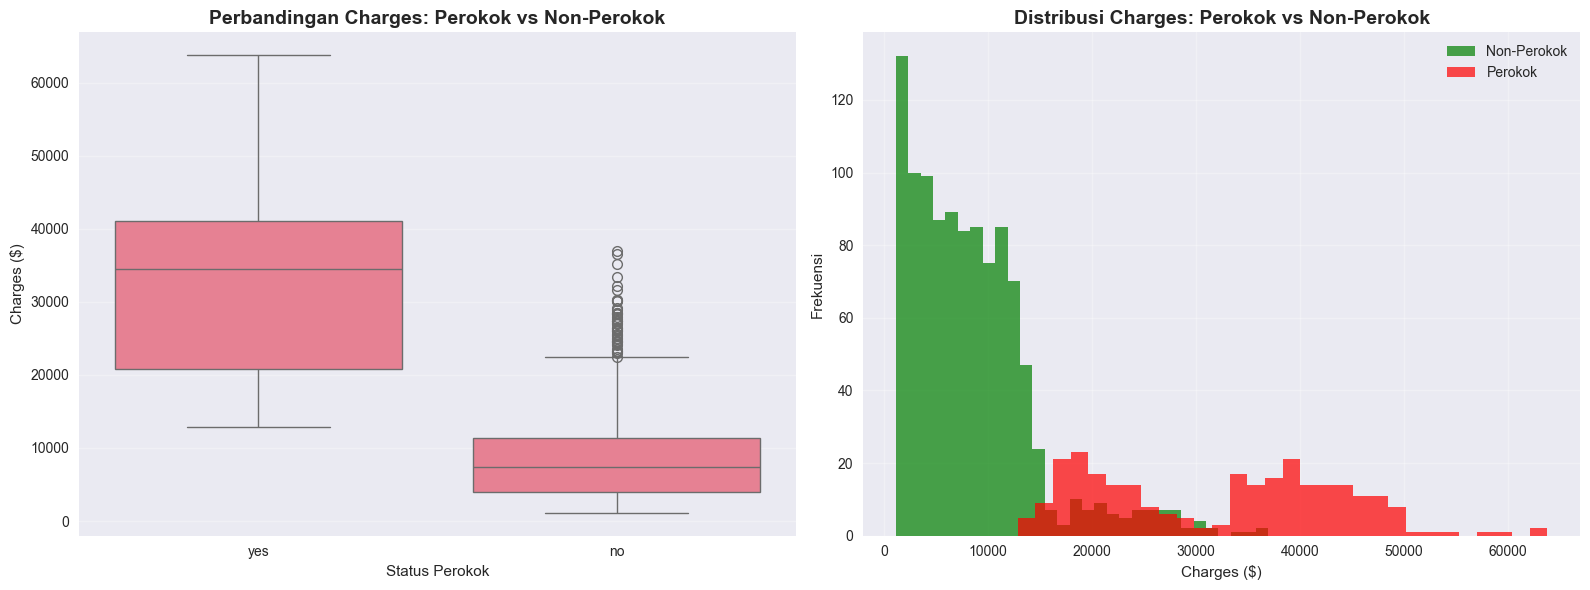

In [21]:
# SIGNIFICANCE TEST: Hypothesis 1 - Status Perokok vs Charges
print("=" * 60)
print("SIGNIFICANCE TEST: Status Perokok vs Charges")
print("=" * 60)

# Pisahkan data perokok dan non-perokok
smoker_charges = df[df['smoker'] == 'yes']['charges']
non_smoker_charges = df[df['smoker'] == 'no']['charges']

print(f"\nStatistik Deskriptif:")
print(f"Perokok:")
print(f"  - Jumlah sampel: {len(smoker_charges)}")
print(f"  - Rata-rata: ${smoker_charges.mean():.2f}")
print(f"  - Std Dev: ${smoker_charges.std():.2f}")
print(f"\nNon-Perokok:")
print(f"  - Jumlah sampel: {len(non_smoker_charges)}")
print(f"  - Rata-rata: ${non_smoker_charges.mean():.2f}")
print(f"  - Std Dev: ${non_smoker_charges.std():.2f}")

# Visualisasi perbandingan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot perbandingan
sns.boxplot(data=df, x='smoker', y='charges', ax=axes[0])
axes[0].set_title('Perbandingan Charges: Perokok vs Non-Perokok', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Status Perokok')
axes[0].set_ylabel('Charges ($)')

# Histogram overlay
axes[1].hist(non_smoker_charges, bins=30, alpha=0.7, label='Non-Perokok', color='green')
axes[1].hist(smoker_charges, bins=30, alpha=0.7, label='Perokok', color='red')
axes[1].set_title('Distribusi Charges: Perokok vs Non-Perokok', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Charges ($)')
axes[1].set_ylabel('Frekuensi')
axes[1].legend()

plt.tight_layout()
plt.show()


In [22]:
# Uji t-test (Independent Samples t-test)
# Asumsi: kedua kelompok independen dan distribusi mendekati normal
# Karena sample size besar (>30), kita bisa menggunakan t-test meskipun distribusi tidak normal sempurna
# Note: ttest_ind dan levene sudah diimport di cell awal

print("\n" + "=" * 60)
print("HASIL UJI STATISTIK")
print("=" * 60)

# 1. Uji Levene untuk homogenitas varians
levene_stat, levene_p = levene(smoker_charges, non_smoker_charges)
print(f"\n1. Uji Levene (Homogenitas Varians):")
print(f"   Statistik: {levene_stat:.4f}")
print(f"   p-value: {levene_p:.4f}")
if levene_p > 0.05:
    print("   Kesimpulan: Varians homogen (equal variance)")
    equal_var = True
else:
    print("   Kesimpulan: Varians tidak homogen (unequal variance)")
    equal_var = False

# 2. Independent Samples t-test
t_stat, p_value = ttest_ind(smoker_charges, non_smoker_charges, equal_var=equal_var)

print(f"\n2. Independent Samples t-test:")
print(f"   H0: μ_perokok = μ_non_perokok (tidak ada perbedaan rata-rata)")
print(f"   H1: μ_perokok ≠ μ_non_perokok (ada perbedaan rata-rata)")
print(f"\n   Statistik t: {t_stat:.4f}")
print(f"   p-value: {p_value:.2e}")
print(f"   Alpha: 0.05")

# Interpretasi
print(f"\n3. INTERPRETASI:")
if p_value < 0.05:
    print(f"   ✓ p-value ({p_value:.2e}) < 0.05")
    print(f"   ✓ TOLAK H0")
    print(f"   ✓ Ada perbedaan SIGNIFIKAN antara rata-rata charges perokok dan non-perokok")
    print(f"\n   INSIGHT:")
    print(f"   - Perokok memiliki rata-rata charges ${smoker_charges.mean() - non_smoker_charges.mean():.2f} lebih tinggi")
    print(f"   - Perokok membayar {smoker_charges.mean() / non_smoker_charges.mean():.2f}x lebih tinggi daripada non-perokok")
else:
    print(f"   ✗ p-value ({p_value:.4f}) >= 0.05")
    print(f"   ✗ GAGAL TOLAK H0")
    print(f"   ✗ Tidak ada perbedaan signifikan")

# Effect Size (Cohen's d)
def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    return (group1.mean() - group2.mean()) / pooled_std

effect_size = cohens_d(smoker_charges, non_smoker_charges)
print(f"\n4. Effect Size (Cohen's d): {effect_size:.4f}")
if abs(effect_size) < 0.2:
    effect_interpretation = "sangat kecil"
elif abs(effect_size) < 0.5:
    effect_interpretation = "kecil"
elif abs(effect_size) < 0.8:
    effect_interpretation = "sedang"
else:
    effect_interpretation = "BESAR"
print(f"   Interpretasi: Effect size {effect_interpretation}")
print(f"   → Perbedaan antara kedua kelompok sangat signifikan secara praktis!")



HASIL UJI STATISTIK

1. Uji Levene (Homogenitas Varians):
   Statistik: 332.6135
   p-value: 0.0000
   Kesimpulan: Varians tidak homogen (unequal variance)

2. Independent Samples t-test:
   H0: μ_perokok = μ_non_perokok (tidak ada perbedaan rata-rata)
   H1: μ_perokok ≠ μ_non_perokok (ada perbedaan rata-rata)

   Statistik t: 32.7519
   p-value: 5.89e-103
   Alpha: 0.05

3. INTERPRETASI:
   ✓ p-value (5.89e-103) < 0.05
   ✓ TOLAK H0
   ✓ Ada perbedaan SIGNIFIKAN antara rata-rata charges perokok dan non-perokok

   INSIGHT:
   - Perokok memiliki rata-rata charges $23615.96 lebih tinggi
   - Perokok membayar 3.80x lebih tinggi daripada non-perokok

4. Effect Size (Cohen's d): 3.1613
   Interpretasi: Effect size BESAR
   → Perbedaan antara kedua kelompok sangat signifikan secara praktis!


## 8. Conclusion & Next Steps

Kesimpulan dan langkah selanjutnya.


In [23]:
print("=" * 60)
print("KESIMPULAN & NEXT STEPS")
print("=" * 60)

print("""
KESIMPULAN:

1. DATA QUALITY
   ✓ Dataset bersih dan siap digunakan
   ✓ Tidak ada missing values atau duplikasi
   ✓ Data telah melalui proses cleaning dan feature engineering

2. KEY INSIGHTS
   ✓ Status perokok adalah faktor paling signifikan yang mempengaruhi charges
   ✓ Usia memiliki korelasi positif dengan charges
   ✓ BMI tinggi (obese) cenderung meningkatkan charges
   ✓ Kombinasi faktor risiko menghasilkan charges yang sangat tinggi

3. STATISTICAL SIGNIFICANCE
   ✓ Uji t-test menunjukkan perbedaan HIGHLY SIGNIFIKAN antara perokok dan non-perokok
   ✓ Effect size sangat besar, menunjukkan pentingnya faktor ini secara praktis
   ✓ Temuan ini sangat actionable untuk bisnis asuransi

4. DATA READINESS
   ✓ Data telah siap untuk:
     - Supervised Learning (regression untuk prediksi charges)
     - Unsupervised Learning (clustering untuk segmentasi nasabah)
     - Feature engineering telah dilakukan
     - Encoding untuk variabel kategorikal telah selesai

NEXT STEPS:

1. MACHINE LEARNING MODELS
   - Build regression models untuk prediksi charges:
     * Linear Regression
     * Random Forest Regressor
     * Gradient Boosting Regressor
   - Evaluasi model dengan metrics: R², RMSE, MAE
   - Feature importance analysis

2. ADVANCED ANALYSIS
   - Clustering analysis untuk segmentasi nasabah berdasarkan karakteristik
   - Anomaly detection untuk identifikasi outlier charges
   - Time series analysis jika ada data temporal

3. BUSINESS RECOMMENDATIONS
   - Implementasi pricing strategy berdasarkan faktor risiko
   - Program kesehatan untuk mengurangi merokok
   - Kampanye kesehatan untuk manajemen BMI
   - Segmentasi produk asuransi berdasarkan profil risiko

4. MODEL DEPLOYMENT
   - Deploy model untuk prediksi charges real-time
   - Build dashboard untuk monitoring dan analisis
   - Integrasi dengan sistem pricing asuransi
""")


KESIMPULAN & NEXT STEPS

KESIMPULAN:

1. DATA QUALITY
   ✓ Dataset bersih dan siap digunakan
   ✓ Tidak ada missing values atau duplikasi
   ✓ Data telah melalui proses cleaning dan feature engineering

2. KEY INSIGHTS
   ✓ Status perokok adalah faktor paling signifikan yang mempengaruhi charges
   ✓ Usia memiliki korelasi positif dengan charges
   ✓ BMI tinggi (obese) cenderung meningkatkan charges
   ✓ Kombinasi faktor risiko menghasilkan charges yang sangat tinggi

3. STATISTICAL SIGNIFICANCE
   ✓ Uji t-test menunjukkan perbedaan HIGHLY SIGNIFIKAN antara perokok dan non-perokok
   ✓ Effect size sangat besar, menunjukkan pentingnya faktor ini secara praktis
   ✓ Temuan ini sangat actionable untuk bisnis asuransi

4. DATA READINESS
   ✓ Data telah siap untuk:
     - Supervised Learning (regression untuk prediksi charges)
     - Unsupervised Learning (clustering untuk segmentasi nasabah)
     - Feature engineering telah dilakukan
     - Encoding untuk variabel kategorikal telah selesai